In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [2]:
df_MixedSet_pre = pd.read_csv('../../data/drug_sensitivity_MixedSet_Erlotinib_test&prediction.csv', index_col=0)
df_drug_mean_std = pd.read_csv('../../data/gdsc_drug_mean_std.csv')
# 将df_MixedSet_pre和df_drug_mean_std合并，以df_MixedSet_pre的drug，df_drug_mean_std的Drug_Name为键
df_MixedSet_pre = pd.merge(df_MixedSet_pre, df_drug_mean_std, left_on='drug', right_on='Drug_Name')
# 去掉Drug_Name列
df_MixedSet_pre = df_MixedSet_pre.drop(columns=['Drug_Name'])
# 分别计算IC50和prediction的Z-score
df_MixedSet_pre['IC50_Z'] = (df_MixedSet_pre['IC50'] - df_MixedSet_pre['IC50_mean']) / df_MixedSet_pre['IC50_std']
df_MixedSet_pre['prediction_Z'] = (df_MixedSet_pre['prediction'] - df_MixedSet_pre['IC50_mean']) / df_MixedSet_pre['IC50_std']
# 去掉IC50_mean, IC50_std列
df_MixedSet_pre = df_MixedSet_pre.drop(columns=['IC50_mean', 'IC50_std'])
# 按照prediction从小到大排序
df_MixedSet_pre = df_MixedSet_pre.sort_values(by='prediction')
df_MixedSet_pre.head()

,drug,cell_line,OncotreeCode,IC50,prediction,IC50_Z,prediction_Z
2673,Dactinomycin,FARAGE,GCB,-5.584391,-7.048384,-0.962114,-1.739618
8706,Dactinomycin,OCILY19,DLBCLNOS,-7.705546,-7.004467,-2.088626,-1.716294
9844,Daporinad,RPMI8402,TLL,-7.312357,-6.966440,-1.417415,-1.294112
5607,Dasatinib,LAMA84,CML,-8.280412,-6.959291,-4.116759,-3.548309
6680,Vinblastine,MOLT16,TLL,-6.277419,-6.786866,-1.278285,-1.512218


In [3]:
df_MixedSet_pre['drug'].unique()

array(['Dactinomycin', 'Daporinad', 'Dasatinib', 'Vinblastine', 'SN-38',
       'Docetaxel', 'Rapamycin', 'Romidepsin', 'Sepantronium bromide',
       'Vinorelbine', 'Nilotinib', 'Vincristine', 'Bortezomib',
       'Paclitaxel', 'Gemcitabine', 'Temsirolimus', 'Camptothecin',
       'Bosutinib', 'Trametinib', 'BI-2536', 'Dinaciclib', 'Luminespib',
       'PD0325901', 'LMP744', 'Staurosporine', 'Elesclomol', 'Teniposide',
       'Mitoxantrone', 'ABT737', 'Navitoclax', 'Epirubicin',
       'Methotrexate', 'Dactolisib', 'Selumetinib', 'Venetoclax',
       'AZD5153', 'AZD5991', 'Lestaurtinib', 'Topotecan', 'Afatinib',
       'Cytarabine', 'Talazoparib', 'Refametinib', 'Alisertib',
       'Dabrafenib', 'Dihydrorotenone', 'Pictilisib', 'Tanespimycin',
       'Pevonedistat', 'Tozasertib', 'Podophyllotoxin bromide',
       'Sabutoclax', 'AZD7762', 'AZD8055', 'Schweinfurthin A', 'OTX015',
       'AZD5582', 'Uprosertib', 'Taselisib', 'AZD4547', 'MG-132', 'JQ1',
       'Foretinib', 'GNE-317', 'Sap

In [4]:
# 取前列
df_MixedSet_pre_3cols = df_MixedSet_pre[['drug', 'cell_line','OncotreeCode']]
# 按照cell_line排序
df_MixedSet_pre_3cols = df_MixedSet_pre_3cols.sort_values(by='cell_line')
df_MixedSet_pre_3cols.head()

,drug,cell_line,OncotreeCode
12,Podophyllotoxin bromide,22RV1,PRAD
7,GNE-317,22RV1,PRAD
8,IWP-2,22RV1,PRAD
3,Crizotinib,22RV1,PRAD
14,SCH772984,22RV1,PRAD


In [5]:
# 将每个细胞系的所有药物名称存储为set
cell_line_drug_set = {}
for index, row in df_MixedSet_pre_3cols.iterrows():
    cell_line = row['cell_line']
    drug = row['drug']
    if cell_line not in cell_line_drug_set:
        cell_line_drug_set[cell_line] = set()
    cell_line_drug_set[cell_line].add(drug)

print(cell_line_drug_set)

{'22RV1': {'Entinostat', 'SB216763', 'Podophyllotoxin bromide', 'Crizotinib', 'BMS-754807', 'GNE-317', 'SCH772984', 'PFI-1', 'YK-4-279', 'VE821', 'WIKI4', 'Daporinad', 'IWP-2', 'AZD5582', 'JNK Inhibitor VIII', 'Cediranib', 'Picolinici-acid', 'Schweinfurthin A', 'Doramapimod'}, '2313287': {'Pyridostatin', 'Pictilisib', 'PD173074', 'BI-2536', 'AGI-6780', 'BMS-345541', 'Olaparib', 'RVX-208', 'KU-55933', 'Foretinib', 'JQ1', 'LGK974', 'MK-1775', 'BMS-754807', 'MIRA-1', 'LY2109761', 'IWP-2', 'Gallibiscoquinazole', 'CZC24832'}, '42MGBA': {'MK-2206', 'EHT-1864', 'Nilotinib', 'AZD1332', 'I-BET-762', 'Talazoparib', 'AZD2014', 'ML323', 'AZD8055', 'MIRA-1', 'Obatoclax Mesylate', 'Mirin', 'UMI-77', 'PRIMA-1MET', 'GSK2110183B', 'OSI-027', 'AZD5153', 'AGI-5198', 'AZD3759'}, '5637': {'L-Oxonoreleagnine', 'Pictilisib', 'Bortezomib', 'SB216763', 'Nelarabine', 'Dacarbazine', 'AZD5991', 'BMS-754807', 'Irinotecan', 'Topotecan', 'LJI308', 'OF-1', 'SN-38', 'Picolinici-acid', 'AZD5153', 'Doramapimod', 'Motesa

In [6]:
def find_max_drug_intersections(data):
    # 将数据转换为字典的字典形式
    cell_line_to_drugs = data

    # 计算每对细胞系的药物交集大小
    intersections = {}
    cell_lines = list(cell_line_to_drugs.keys())
    for i in range(len(cell_lines)):
        for j in range(i + 1, len(cell_lines)):
            cell_line1 = cell_lines[i]
            cell_line2 = cell_lines[j]
            drugs1 = set(cell_line_to_drugs[cell_line1])
            drugs2 = set(cell_line_to_drugs[cell_line2])
            intersection = len(drugs1 & drugs2)
            intersections[(cell_line1, cell_line2)] = intersection

    # 找出两个交集最大的细胞系
    max_intersections = sorted(intersections.items(), key=lambda x: x[1], reverse=True)[:5]
    return max_intersections

max_intersections = find_max_drug_intersections(cell_line_drug_set)
print(max_intersections)

[(('A549', 'NCIH716'), 8), (('BHT101', 'KYSE180'), 8), (('HCC1187', 'NCIH1693'), 8), (('2313287', 'CALU6'), 7), (('5637', 'A673'), 7)]


In [7]:
df_A549 = df_MixedSet_pre[df_MixedSet_pre['cell_line'] == 'A549']
df_A549.head(10)

,drug,cell_line,OncotreeCode,IC50,prediction,IC50_Z,prediction_Z
461,Gemcitabine,A549,LUAD,-3.595753,-2.828816,-0.939695,-0.684943
465,OTX015,A549,LUAD,1.100080,0.752748,-0.642728,-0.828676
455,Bleomycin,A549,LUAD,0.997003,1.329773,-1.147677,-0.915692
453,AZD5438,A549,LUAD,1.391646,1.415604,-0.644783,-0.629001
470,YK-4-279,A549,LUAD,1.604431,1.543394,-0.389218,-0.426176
456,Cediranib,A549,LUAD,2.035846,1.653974,-0.197324,-0.517586
471,ZM447439,A549,LUAD,2.007056,1.952309,-0.334005,-0.366096
452,5-azacytidine,A549,LUAD,1.847137,2.271099,-0.820443,-0.515613
469,Savolitinib,A549,LUAD,3.832341,2.738345,0.917173,-0.001801
463,Linsitinib,A549,LUAD,3.200767,3.286070,-0.577650,-0.513134


In [8]:
df_NCIH716 = df_MixedSet_pre[df_MixedSet_pre['cell_line'] == 'NCIH716']
df_NCIH716.head(10)

,drug,cell_line,OncotreeCode,IC50,prediction,IC50_Z,prediction_Z
8285,MG-132,NCIH716,COAD,-1.684555,-1.358844,-0.553978,-0.103174
8293,Vincristine,NCIH716,COAD,-0.935523,-0.314834,0.259996,0.496951
8292,Uprosertib,NCIH716,COAD,2.508591,1.914536,-0.208165,-0.556112
8287,OTX015,NCIH716,COAD,3.215223,1.931815,0.489633,-0.197451
8277,AZ6102,NCIH716,COAD,2.034493,2.027767,-0.562747,-0.568705
8291,SGC0946,NCIH716,COAD,3.112222,2.111873,1.262141,0.009459
8279,GSK2110183B,NCIH716,COAD,2.715761,2.477404,-0.375640,-0.528693
8282,Ipatasertib,NCIH716,COAD,4.429537,2.669253,0.704720,-0.504786
8276,5-azacytidine,NCIH716,COAD,3.519749,2.906970,0.382171,-0.058420
8280,Gemcitabine,NCIH716,COAD,3.870440,3.141342,1.540339,1.298155


In [9]:
df_HCC38 = df_MixedSet_pre[df_MixedSet_pre['cell_line'] == 'HCC38']
df_HCC38.head(10)

,drug,cell_line,OncotreeCode,IC50,prediction,IC50_Z,prediction_Z
3362,Daporinad,HCC38,IDC,-2.693662,-4.197317,0.228936,-0.307047
3359,AZD7762,HCC38,IDC,-0.461483,0.363624,-0.405722,0.129115
3370,LMP744,HCC38,IDC,-1.022948,0.451108,-0.292822,0.339534
3371,MK-1775,HCC38,IDC,0.524407,1.066797,-0.078954,0.303054
3363,Dihydrorotenone,HCC38,IDC,1.216858,2.099088,0.273593,0.832753
3374,WEHI-539,HCC38,IDC,1.310872,2.909636,-1.378893,-0.447776
3358,AZD5438,HCC38,IDC,5.364875,3.179700,1.972524,0.533072
3369,Irinotecan,HCC38,IDC,3.417486,3.231059,0.479242,0.382862
3361,Cediranib,HCC38,IDC,2.884132,3.293483,0.514100,0.857407
3368,Ipatasertib,HCC38,IDC,4.780449,4.089010,0.945834,0.470741


# 选取药物 三种：

In [57]:
df_Pevonedistat = df_MixedSet_pre[df_MixedSet_pre['drug'] == 'Pevonedistat']
df_Pevonedistat.head(10)

,drug,cell_line,OncotreeCode,IC50,prediction,IC50_Z,prediction_Z
128,Pevonedistat,697,BLL,-1.360520,-2.167114,-1.039244,-1.414805
6777,Pevonedistat,NALM6,BLL,-1.162747,-1.699618,-0.947159,-1.197133
2682,Pevonedistat,FARAGE,GCB,-2.107368,-1.540683,-1.386987,-1.123131
6638,Pevonedistat,MOLM16,AML,-0.992230,-1.492576,-0.867764,-1.100732
9435,Pevonedistat,PL21,AML,-1.831793,-1.429256,-1.258676,-1.071249
85,Pevonedistat,639V,UCU,-1.137647,-1.139332,-0.935472,-0.936257
2020,Pevonedistat,D283MED,MBL,-2.317395,-0.990968,-1.484778,-0.867176
7476,Pevonedistat,NCIH1963,SCLC,-3.098671,-0.974772,-1.848550,-0.859635
9165,Pevonedistat,P31FUJ,AML,-0.823622,-0.946451,-0.789258,-0.846449
4939,Pevonedistat,KELLY,NBL,-0.728914,-0.870961,-0.745161,-0.811300


In [11]:
df_Dactolisib = df_MixedSet_pre[df_MixedSet_pre['drug'] == 'Dasatinib']
df_Dactolisib.head(11)

,drug,cell_line,OncotreeCode,IC50,prediction,IC50_Z,prediction_Z
5607,Dasatinib,LAMA84,CML,-8.280412,-6.959291,-4.116759,-3.548309
3934,Dasatinib,HSC3,OCSC,-0.757893,-1.585665,-0.879977,-1.236150
3517,Dasatinib,HDQP1,IDC,-2.767405,-1.565570,-1.744628,-1.227503
905,Dasatinib,BPH1,NaN,-2.678168,-1.215568,-1.706231,-1.076905
12065,Dasatinib,TOV21G,CCOV,-2.113615,-1.192560,-1.463316,-1.067005
3973,Dasatinib,HT,DLBCLNOS,-3.338605,-1.133513,-1.990403,-1.041598
7974,Dasatinib,NCIH292,LUMEC,-0.957758,-0.942573,-0.965974,-0.959441
9296,Dasatinib,PATU8988T,PAAD,0.060700,-0.741518,-0.527753,-0.872931
10784,Dasatinib,SNB75,GB,-0.279140,-0.699759,-0.673979,-0.854963
10622,Dasatinib,SKN,ULMS,-1.570692,-0.450626,-1.229707,-0.747766


In [12]:
df_AZD8055 = df_MixedSet_pre[df_MixedSet_pre['drug'] == 'AZD8055']
df_AZD8055.head(10)

,drug,cell_line,OncotreeCode,IC50,prediction,IC50_Z,prediction_Z
6756,AZD8055,MV411,AML,-2.706919,-2.089222,-1.948221,-1.497874
6610,AZD8055,MOLM13,AML,-2.200490,-2.027820,-1.578996,-1.453107
6648,AZD8055,MOLP8,PCM,-2.178997,-1.681825,-1.563327,-1.200851
9680,AZD8055,RH41,ARMS,-2.673244,-1.652861,-1.923670,-1.179734
4738,AZD8055,JVM3,BPLL,-1.969494,-1.494076,-1.410584,-1.063968
2832,AZD8055,GA10,BL,-1.637329,-1.422344,-1.168410,-1.011670
3022,AZD8055,H4,ASTR,-1.440728,-1.421941,-1.025073,-1.011376
12431,AZD8055,YH13,GB,-1.541122,-1.342816,-1.098269,-0.953688
6171,AZD8055,MDAMB453,BRCA,-2.042360,-1.160465,-1.463708,-0.820741
8098,AZD8055,NCIH520,LUSC,-1.909361,-0.959618,-1.366742,-0.674309


In [13]:
df_PD0325901 = df_MixedSet_pre[df_MixedSet_pre['drug'] == 'PD0325901']
df_PD0325901.head(10)

,drug,cell_line,OncotreeCode,IC50,prediction,IC50_Z,prediction_Z
10509,PD0325901,SKMEL28,SKCM,-4.328333,-4.293523,-2.644394,-2.628168
1847,PD0325901,COLO800,SKCM,-3.526498,-2.850867,-2.270638,-1.955709
4089,PD0325901,HT29,COAD,-2.435552,-2.615621,-1.762120,-1.846054
801,PD0325901,BHT101,THAP,-2.897905,-1.999452,-1.977634,-1.558842
3620,PD0325901,HEP3B217,HCC,-1.394020,-1.623602,-1.276634,-1.383648
12035,PD0325901,THP1,AML,-0.095676,-1.519687,-0.671442,-1.335211
600,PD0325901,AM38,GB,-1.725701,-1.332307,-1.431239,-1.247868
11629,PD0325901,SW948,COAD,-1.231857,-1.317335,-1.201046,-1.240889
2630,PD0325901,ESO51,ESCA,-0.516364,-0.752966,-0.867536,-0.977822
9164,PD0325901,P31FUJ,AML,-0.757547,-0.697964,-0.979957,-0.952184


In [14]:
df_Paclitaxel = df_MixedSet_pre[df_MixedSet_pre['drug'] == 'Paclitaxel']
df_Paclitaxel.head(20)

,drug,cell_line,OncotreeCode,IC50,prediction,IC50_Z,prediction_Z
7745,Paclitaxel,NCIH2171,SCLC,-5.427479,-5.847473,-1.275236,-1.483493
6619,Paclitaxel,MOLM13,AML,-5.876668,-5.845653,-1.497970,-1.482591
9745,Paclitaxel,RL,DLBCLNOS,-5.802949,-5.816971,-1.461416,-1.468369
11165,Paclitaxel,SUDHL4,DLBCLNOS,-4.967285,-5.635205,-1.047046,-1.378239
4463,Paclitaxel,JAR,UCCA,-5.569815,-5.619416,-1.345815,-1.370410
9849,Paclitaxel,RPMI8402,TLL,-4.771135,-5.603816,-0.949783,-1.362674
11127,Paclitaxel,SUDHL1,ALCLALKP,-6.922022,-5.487307,-2.016316,-1.304903
3941,Paclitaxel,HSC3,OCSC,-4.808082,-5.214165,-0.968104,-1.169463
8202,Paclitaxel,NCIH647,LUAS,-4.735895,-5.014444,-0.932309,-1.070430
9869,Paclitaxel,RS411,BLL,-4.650407,-5.010117,-0.889920,-1.068284


In [15]:
df_Docetaxel = df_MixedSet_pre[df_MixedSet_pre['drug'] == 'Docetaxel']

df_Docetaxel.head(20)

,drug,cell_line,OncotreeCode,IC50,prediction,IC50_Z,prediction_Z
8067,Docetaxel,NCIH460,LCLC,-6.669256,-6.628595,-1.276031,-1.260077
4275,Docetaxel,HUTU80,DA,-6.385741,-6.507266,-1.164788,-1.212471
3834,Docetaxel,HS683,ODG,-6.521924,-6.137796,-1.218222,-1.067501
11194,Docetaxel,SUDHL6,DLBCLNOS,-6.032596,-6.126490,-1.026223,-1.063065
10728,Docetaxel,SKPNDW,ES,-5.718170,-6.051600,-0.902851,-1.033680
5346,Docetaxel,KYM1,ERMS,-5.810904,-5.899730,-0.939238,-0.974091
366,Docetaxel,A3KAW,DLBCLNOS,-5.566962,-5.815369,-0.843522,-0.940990
10104,Docetaxel,SF126,GB,-5.067891,-5.810888,-0.647700,-0.939231
9121,Docetaxel,P12ICHIKAWA,TLL,-5.796639,-5.779648,-0.933641,-0.926974
3026,Docetaxel,H4,ASTR,-6.123808,-5.776226,-1.062012,-0.925631


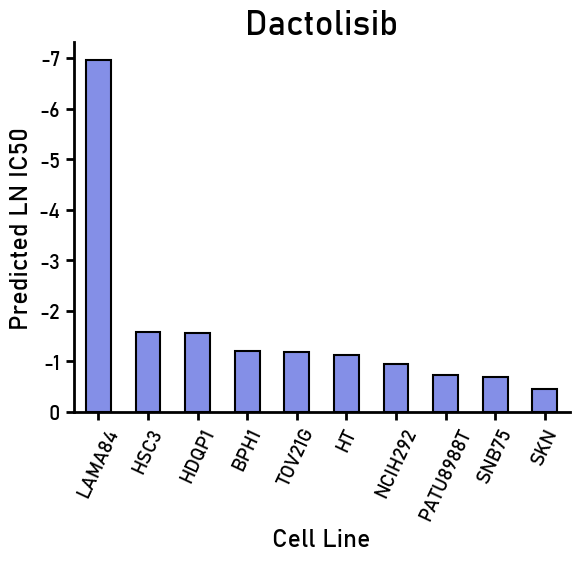

In [16]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 取df_Docetaxel的前10行
df_Dactolisib_10 = df_Dactolisib.head(10)
# df_mix_set_drugs_mean画柱状图，每个cell_line的result列的值，按照variable分成两个柱子，使用seaborn画图
# 设置画布大小
# plt.figure(figsize=(6, 6))
palette = {
    'Ground Truth': '#00B2EE',
    'Prediction': '#FF6A6A'
}
# 画柱状图
plt.gca().invert_yaxis() # 反转Y轴
sns.barplot(x='cell_line', y='prediction', data=df_Dactolisib_10,edgecolor='black',width=0.5,color='#7482F7',linewidth=1.5)
# 设计legend样式
# plt.legend(fontsize=15,edgecolor='black',loc='best')
# 加入Y=0的线
# plt.axhline(0, color='black', linewidth=0.8)
# title
plt.title('Dactolisib', fontsize=25)
plt.xticks(rotation=65, fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Cell Line', fontsize=18)
plt.ylabel('Predicted LN IC50', fontsize=18)
# 去除上和右边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# 加粗横纵坐标
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
# 刻度加粗
plt.gca().tick_params(width=2, length=6)
# 保存图片
# plt.savefig('img/EGFR_Drugs_IC50&Prediction_On_LUAD_MixedSet.png', dpi=300, bbox_inches='tight')
plt.show()

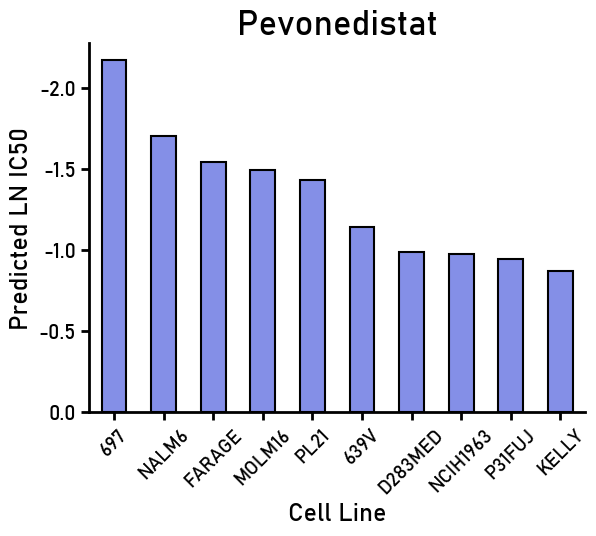

In [59]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 取df_Docetaxel的前10行
df_Pevonedistat_10 = df_Pevonedistat.head(10)
# df_mix_set_drugs_mean画柱状图，每个cell_line的result列的值，按照variable分成两个柱子，使用seaborn画图
# 设置画布大小
# plt.figure(figsize=(6, 6))
# 画柱状图
plt.gca().invert_yaxis() # 反转Y轴
sns.barplot(x='cell_line', y='prediction', data=df_Pevonedistat_10,edgecolor='black',width=0.5,color='#7482F7',linewidth=1.5)
# 设计legend样式
# plt.legend(fontsize=15,edgecolor='black',loc='best')
# 加入Y=0的线
# plt.axhline(0, color='black', linewidth=1.5, linestyle='--')
# title
plt.title('Pevonedistat', fontsize=25)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Cell Line', fontsize=18)
plt.ylabel('Predicted LN IC50', fontsize=18)
# 去除上和右边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# 加粗横纵坐标
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
# 刻度加粗
plt.gca().tick_params(width=2, length=6)
# 保存图片
# plt.savefig('img/EGFR_Drugs_IC50&Prediction_On_LUAD_MixedSet.png', dpi=300, bbox_inches='tight')
plt.show()

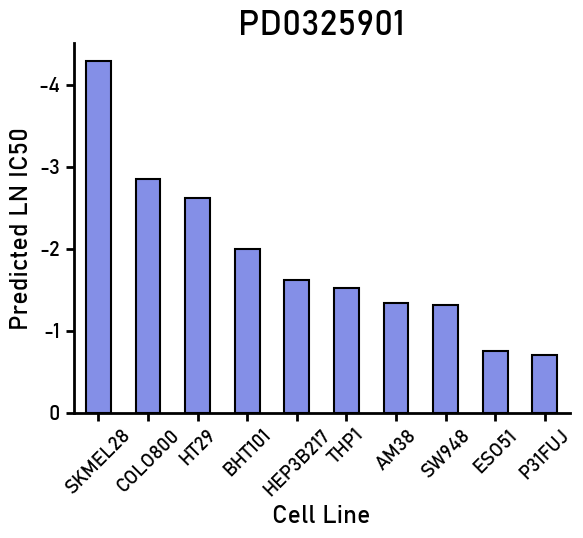

In [132]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 取df_Docetaxel的前10行
df_PD0325901_10 = df_PD0325901.head(10)
# df_mix_set_drugs_mean画柱状图，每个cell_line的result列的值，按照variable分成两个柱子，使用seaborn画图
# 设置画布大小
# plt.figure(figsize=(6, 6))
# 画柱状图
plt.gca().invert_yaxis() # 反转Y轴
sns.barplot(x='cell_line', y='prediction', data=df_PD0325901_10,edgecolor='black',width=0.5,color='#7482F7',linewidth=1.5)
# 设计legend样式
# plt.legend(fontsize=15,edgecolor='black',loc='best')
# 加入Y=0的线
# plt.axhline(0, color='black', linewidth=0.8)
# title
plt.title('PD0325901', fontsize=25)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Cell Line', fontsize=18)
plt.ylabel('Predicted LN IC50', fontsize=18)
# 去除上和右边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# 加粗横纵坐标
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
# 刻度加粗
plt.gca().tick_params(width=2, length=6)
# 保存图片
# plt.savefig('img/EGFR_Drugs_IC50&Prediction_On_LUAD_MixedSet.png', dpi=300, bbox_inches='tight')
plt.show()

In [93]:
df_LAMA84 = df_MixedSet_pre[df_MixedSet_pre['cell_line'] == 'LAMA84']
df_LAMA84.head(20)

,drug,cell_line,OncotreeCode,IC50,prediction,IC50_Z,prediction_Z
5607,Dasatinib,LAMA84,CML,-8.280412,-6.959291,-4.116759,-3.548309
5620,Romidepsin,LAMA84,CML,-6.188206,-5.646011,-0.944329,-0.404159
5622,Sepantronium bromide,LAMA84,CML,-3.909930,-4.352540,0.159539,-0.112340
5614,Methotrexate,LAMA84,CML,-3.450255,-2.820328,-1.526136,-1.273311
5619,Rapamycin,LAMA84,CML,-3.447897,-2.752299,-0.921220,-0.508036
5623,Teniposide,LAMA84,CML,-1.578937,-1.444662,-1.034258,-0.966536
5608,Dihydrorotenone,LAMA84,CML,0.979489,-0.793049,0.123148,-1.000293
5617,OTX015,LAMA84,CML,-0.928230,0.916253,-1.728603,-0.741142
5606,Cisplatin,LAMA84,CML,1.330546,1.002698,-1.026760,-1.203465
5605,Afatinib,LAMA84,CML,0.937092,1.074874,-0.444000,-0.350968


In [114]:
df_SW948 = df_MixedSet_pre[df_MixedSet_pre['cell_line'] == 'SW948']
df_SW948.head(20)

,drug,cell_line,OncotreeCode,IC50,prediction,IC50_Z,prediction_Z
11622,Daporinad,SW948,COAD,-4.550119,-4.427495,-0.432805,-0.389095
11629,PD0325901,SW948,COAD,-1.231857,-1.317335,-1.201046,-1.240889
11631,Rapamycin,SW948,COAD,-1.528877,-0.799537,0.218673,0.651899
11621,AZD8055,SW948,COAD,-1.320921,0.069231,-0.937725,0.075799
11620,AZD7762,SW948,COAD,-0.019826,0.259729,-0.119439,0.061770
11633,Taselisib,SW948,COAD,-0.129392,0.646840,-1.119425,-0.661245
11634,Uprosertib,SW948,COAD,0.745355,1.025918,-1.240918,-1.076588
11632,Sorafenib,SW948,COAD,3.689755,2.622827,0.941704,0.063853
11617,AZ6102,SW948,COAD,1.773897,2.635948,-0.793597,-0.029945
11630,Palbociclib,SW948,COAD,4.045131,3.454783,0.361532,-0.010304


In [64]:
df_WSUDLCL2 = df_MixedSet_pre[df_MixedSet_pre['cell_line'] == 'WSUDLCL2']
df_WSUDLCL2.head(20)

,drug,cell_line,OncotreeCode,IC50,prediction,IC50_Z,prediction_Z
12401,Dactinomycin,WSUDLCL2,DLBCLNOS,-5.120747,-6.007829,-0.715880,-1.186995
12408,Sepantronium bromide,WSUDLCL2,DLBCLNOS,-5.303559,-4.931552,-0.696516,-0.468006
12403,JQ1,WSUDLCL2,DLBCLNOS,-1.865988,-1.264173,-1.993111,-1.684885
12410,Tanespimycin,WSUDLCL2,DLBCLNOS,-0.319408,0.083619,-0.150105,0.103743
12399,AZD6738,WSUDLCL2,DLBCLNOS,0.851625,0.479403,-0.824837,-1.079494
12407,OSI-027,WSUDLCL2,DLBCLNOS,1.042973,0.736231,-1.032162,-1.237496
12405,NU7441,WSUDLCL2,DLBCLNOS,1.614159,0.918626,-1.130054,-1.647646
12397,5-azacytidine,WSUDLCL2,DLBCLNOS,0.453413,1.283933,-1.822536,-1.225389
12406,Nilotinib,WSUDLCL2,DLBCLNOS,1.548980,1.407518,-1.063776,-1.146678
12400,BMS-536924,WSUDLCL2,DLBCLNOS,2.118157,1.669458,0.006660,-0.318218


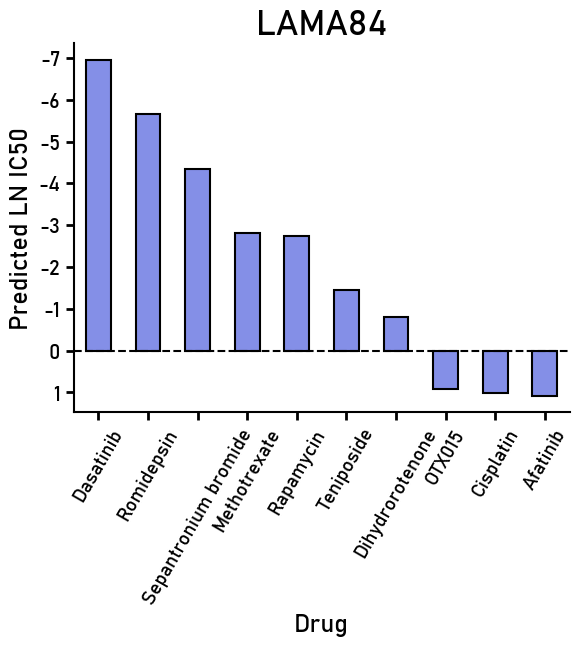

In [136]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 取df_Docetaxel的前10行
df_LAMA84_10 = df_LAMA84.head(10)
# df_mix_set_drugs_mean画柱状图，每个cell_line的result列的值，按照variable分成两个柱子，使用seaborn画图
# 设置画布大小
# plt.figure(figsize=(6, 6))
# 画柱状图
plt.gca().invert_yaxis() # 反转Y轴
sns.barplot(x='drug', y='prediction', data=df_LAMA84_10,edgecolor='black',width=0.5,color='#7482F7',linewidth=1.5)
# 设计legend样式
# plt.legend(fontsize=15,edgecolor='black',loc='best')
# 加入Y=0的线，虚线
plt.axhline(0, color='black', linewidth=1.5, linestyle='--')
# title
plt.title('LAMA84', fontsize=25)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Drug', fontsize=18)
plt.ylabel('Predicted LN IC50', fontsize=18)
# 去除上和右边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# 去除下方的刻度
# plt.gca().xaxis.set_ticks_position('none')
# 加粗横纵坐标
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
# 刻度加粗
plt.gca().tick_params(width=2, length=6)
# 保存图片
# plt.savefig('img/EGFR_Drugs_IC50&Prediction_On_LUAD_MixedSet.png', dpi=300, bbox_inches='tight')
plt.show()

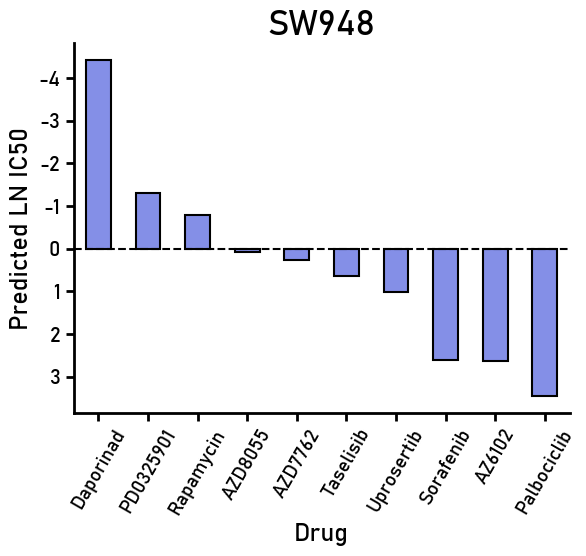

In [133]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 取df_Docetaxel的前10行
df_SW948_10 = df_SW948.head(10)
# df_mix_set_drugs_mean画柱状图，每个cell_line的result列的值，按照variable分成两个柱子，使用seaborn画图
# 设置画布大小
# plt.figure(figsize=(6, 6))
# 画柱状图
plt.gca().invert_yaxis() # 反转Y轴
sns.barplot(x='drug', y='prediction', data=df_SW948_10,edgecolor='black',width=0.5,color='#7482F7',linewidth=1.5)
# 设计legend样式
# plt.legend(fontsize=15,edgecolor='black',loc='best')
# 加入Y=0的线，虚线
plt.axhline(0, color='black', linewidth=1.5, linestyle='--')
# title
plt.title('SW948', fontsize=25)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Drug', fontsize=18)
plt.ylabel('Predicted LN IC50', fontsize=18)
# 去除上和右边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# 去除下方的刻度
# plt.gca().xaxis.set_ticks_position('none')
# 加粗横纵坐标
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
# 刻度加粗
plt.gca().tick_params(width=2, length=6)
# 保存图片
# plt.savefig('img/EGFR_Drugs_IC50&Prediction_On_LUAD_MixedSet.png', dpi=300, bbox_inches='tight')
plt.show()

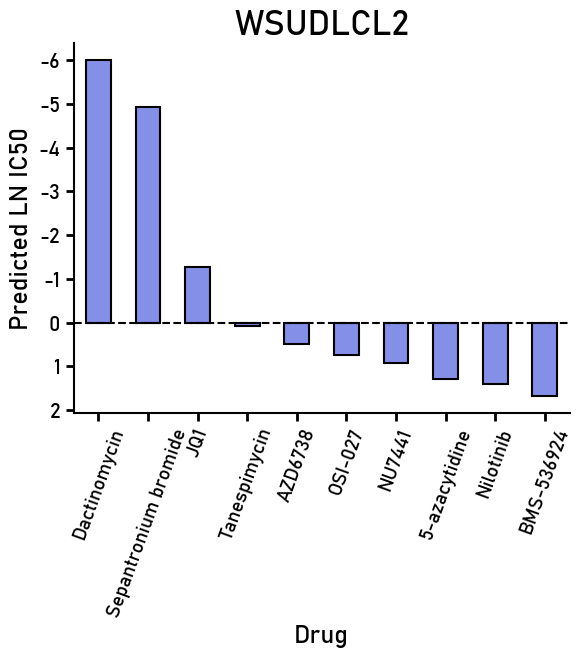

In [66]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 取df_Docetaxel的前10行
df_WSUDLCL2_10 = df_WSUDLCL2.head(10)
# df_mix_set_drugs_mean画柱状图，每个cell_line的result列的值，按照variable分成两个柱子，使用seaborn画图
# 设置画布大小
# plt.figure(figsize=(6, 6))
# 画柱状图
plt.gca().invert_yaxis() # 反转Y轴
sns.barplot(x='drug', y='prediction', data=df_WSUDLCL2_10,edgecolor='black',width=0.5,color='#7482F7',linewidth=1.5)
# 设计legend样式
# plt.legend(fontsize=15,edgecolor='black',loc='best')
# 加入Y=0的线，虚线
plt.axhline(0, color='black', linewidth=1.5, linestyle='--')
# title
plt.title('WSUDLCL2', fontsize=25)
plt.xticks(rotation=70, fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Drug', fontsize=18)
plt.ylabel('Predicted LN IC50', fontsize=18)
# 去除上和右边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# 去除下方的刻度
# plt.gca().xaxis.set_ticks_position('none')
# 加粗横纵坐标
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
# 刻度加粗
plt.gca().tick_params(width=2, length=6)
# 保存图片
# plt.savefig('img/EGFR_Drugs_IC50&Prediction_On_LUAD_MixedSet.png', dpi=300, bbox_inches='tight')
plt.show()